In [1]:
# %pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import numpy as np
import random
np.set_printoptions(suppress=True)

In [2]:
ROCK, PAPER, SCISSORS = 0, 1, 2
NUM_ACTIONS = 3

# oppStrategy = np.array([0.33, 0.33, 0.33])
def value(p1, p2):
    if p1==p2:
        return 0
    if (p1-1)%NUM_ACTIONS == p2:
        return 1
    else:
        return -1

In [3]:
def normalize(strategy):
    strategy = np.copy(strategy)
    normalizingSum = np.sum(strategy)
    if normalizingSum > 0:
        strategy /= normalizingSum
    else:
        strategy = np.ones(strategy.shape[0])/strategy.shape[0]
    return strategy

def getStrategy(regretSum):
    return normalize(np.maximum(regretSum, 0))

def getAction(strategy):
    strategy = strategy / np.sum(strategy) # Normalize
    return np.searchsorted(np.cumsum(strategy), random.random())

In [4]:
def innertrain(regretSum, strategySum, oppStrategy):
    # accum the current strategy based on regret
    strategy = getStrategy(regretSum)
    strategySum += strategy

    # select my action and opponent action
    myAction = getAction(strategy)
    otherAction = getAction(oppStrategy)

    # For rock paper scissors only? can use value()?
    actionUtility = np.zeros(NUM_ACTIONS)
    actionUtility[otherAction] = 0
        # If rock (0) is chosen then the other two (1, 2) will get a regret value
            # Positive regret value means that decision should've been chosen
            # Negative regret value means the decision that would've been regretted
        # So if otherAction is 0 (rock) then actionUtility[PAPER] would equal 1
            # and actionUtility[SCISSORS] would equal -1
    actionUtility[(otherAction + 1) % NUM_ACTIONS] = 1
    actionUtility[(otherAction - 1) % NUM_ACTIONS] = -1

    # acc
    regretSum += actionUtility - actionUtility[myAction]
    
    return regretSum, strategySum

def train(iterations):
    regretSum = np.zeros(NUM_ACTIONS)
    strategySum = np.zeros(NUM_ACTIONS)
    oppStrategy = np.array([0.4, 0.3, 0.3])
    
    for i in range(iterations):
        regretSum, strategySum = innertrain(regretSum, strategySum, oppStrategy)
        
    return strategySum

def train2p(oiterations, iterations):
    
    strategySumP1 = np.zeros(NUM_ACTIONS)
    strategySumP2 = np.zeros(NUM_ACTIONS)
    
    for j in range(oiterations):
        oppStrategy = normalize(strategySumP2)
        regretSumP1 = np.zeros(NUM_ACTIONS)
        
        for i in range(iterations):
            regretSumP1, strategySumP1 = innertrain(regretSumP1, strategySumP1, oppStrategy)
        
        oppStrategy = normalize(strategySumP1)
        regretSumP2 = np.zeros(NUM_ACTIONS)
        
        for i in range(iterations):
            regretSumP2, strategySumP2 = innertrain(regretSumP2, strategySumP2, oppStrategy)
        
        print("%3d" % j, normalize(strategySumP1), normalize(strategySumP2))
        
    return strategySumP1, strategySumP2

s1, s2 = train2p(60, 5000)
normalize(s1), normalize(s2)

  0 [0.09908261 0.73462397 0.16629342] [0.0002     0.00026667 0.99953333]
  1 [0.54940797 0.36737865 0.08321338] [0.00013333 0.4999     0.49996667]
  2 [0.36637568 0.24497836 0.38864596] [0.32980395 0.33674234 0.3334537 ]
  3 [0.27801252 0.27926179 0.44272569] [0.4966788  0.25259009 0.25073111]
  4 [0.22262335 0.42316943 0.35420722] [0.39766704 0.20209874 0.40023422]
  5 [0.34890577 0.35513266 0.29596157] [0.33152687 0.31885706 0.34961607]
  6 [0.43483456 0.30581843 0.25934701] [0.28419922 0.41610605 0.29969472]
  7 [0.38051357 0.26765363 0.3518328 ] [0.37293038 0.36435918 0.26271044]
  8 [0.3392509  0.34796254 0.31278656] [0.33232229 0.37718962 0.29048809]
  9 [0.30603843 0.40389169 0.29006989] [0.2996088  0.34070839 0.35968281]
 10 [0.27895311 0.36718638 0.3538605 ] [0.27935977 0.31205503 0.40858521]
 11 [0.33677065 0.33678443 0.32644493] [0.25685232 0.36428627 0.37886141]
 12 [0.31282508 0.31093605 0.37623887] [0.31267808 0.33631019 0.35101173]
 13 [0.3288085  0.28911632 0.38207519]

(array([0.3183769 , 0.36248123, 0.31914188]),
 array([0.32875476, 0.33770177, 0.33354347]))

In [5]:
strategy, oppStrategy = normalize(s1), normalize(s2)
strategy, oppStrategy

(array([0.3183769 , 0.36248123, 0.31914188]),
 array([0.32875476, 0.33770177, 0.33354347]))

In [6]:
strategySum = train(1000)
# getAverageStrategy(strategySum)
normalize(strategySum)

array([0.00033333, 0.98785476, 0.0118119 ])

([<matplotlib.lines.Line2D at 0x110cc39b0>], -0.205, 0.0)

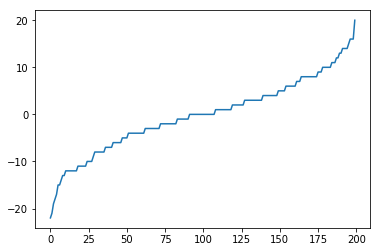

In [7]:
vvv = []
for j in range(200):
    vv = 0
    for i in range(100):
#         strategy = getStrategy()
#         strategy = [0,1,0]
        myAction = getAction(strategy)
        otherAction = getAction(oppStrategy)
        vv += value(myAction, otherAction)
    vvv.append(vv)
plt.plot(sorted(vvv)), np.mean(vvv), np.median(vvv)

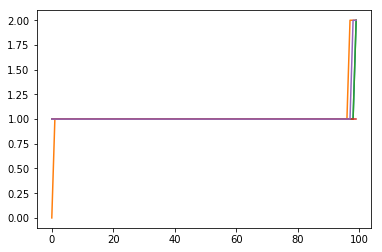

In [8]:
# strategy = getAverageStrategy(strategySum)
strategy = normalize(strategySum)
for j in range(5):
    a = [getAction(getStrategy(strategy)) for i in range(100)]
    plt.plot(sorted(a))